### This notebook covers how to get statistics on videos returned for a list of search terms on YouTube with the use of YouTube Data API v3. 

First go to [Google Developer](http://console.developers.google.com/) and enable YouTube Data API v3 by clicking on the button "+ ENABLE APIS AND SERVICES" and searching for YouTube Data API v3. Next, get your unique developer key from the Credentials setting. Then run the following in command line to install the necessary client: `pip install --upgrade google-api-python-client`

There are only two things which you need to modify in this notebook. 1) Paste the developer key in the code below. 2) Change the search terms in the keywords list to what you want. 

<img src="https://static.wixstatic.com/media/1ea3da_6e02db1850d845ec9e4325ee8c56eb12~mv2.png/v1/fill/w_1035,h_338,al_c,q_80,usm_0.66_1.00_0.01/1ea3da_6e02db1850d845ec9e4325ee8c56eb12~mv2.webp">

In [1]:
from apiclient.discovery import build
from apiclient.errors import HttpError
from oauth2client.tools import argparser
import pandas as pd
import numpy as np
import pprint 
import matplotlib.pyplot as plt

DEVELOPER_KEY = "" #paste key here in between ""
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"


In [2]:
#input list of search terms of interest 
keywords = ["bts","blackpink","twice","one direction"]

In [3]:
youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,developerKey=DEVELOPER_KEY)

max_results=50
order="relevance"
token=None
location=None
location_radius=None

title = []
channelId = []
channelTitle = []
categoryId = []
videoId = []
pubDate = [] 
viewCount = []
likeCount = []
dislikeCount = []
commentCount = []
favoriteCount = []
category = []
tags = []
videos = []
keyword = []

for q in keywords:
    search_response = youtube.search().list(
    q=q,
    type="video",
    pageToken=token,
    order = order,
    part="id,snippet",  
    maxResults=max_results,
    location=location,
    locationRadius=location_radius).execute()


    for search_result in search_response.get("items", []):

        keyword.append(q)

        if search_result["id"]["kind"] == "youtube#video":

            title.append(search_result['snippet']['title']) 

            videoId.append(search_result['id']['videoId'])

            response = youtube.videos().list(
                part='statistics, snippet',
                id=search_result['id']['videoId']).execute()

            channelId.append(response['items'][0]['snippet']['channelId'])
            channelTitle.append(response['items'][0]['snippet']['channelTitle'])
            pubDate.append(response['items'][0]['snippet']['publishedAt'])
            categoryId.append(response['items'][0]['snippet']['categoryId'])
            favoriteCount.append(response['items'][0]['statistics']['favoriteCount'])
            viewCount.append(response['items'][0]['statistics']['viewCount'])
            try:
                likeCount.append(response['items'][0]['statistics']['likeCount'])
            except:
                likeCount.append("NaN")

            try:
                dislikeCount.append(response['items'][0]['statistics']['dislikeCount'])     
            except:
                dislikeCount.append("NaN")

            if 'commentCount' in response['items'][0]['statistics'].keys():
                commentCount.append(response['items'][0]['statistics']['commentCount'])
            else:
                commentCount.append(0)

            if 'tags' in response['items'][0]['snippet'].keys():
                tags.append(response['items'][0]['snippet']['tags'])
            else:
                tags.append("No Tags")        


In [5]:
youtube_dict = {'pubDate': pubDate,'tags': tags,'channelId': channelId,'channelTitle': channelTitle,'categoryId':categoryId,'title':title,'videoId':videoId,'viewCount':viewCount,'likeCount':likeCount,'dislikeCount':dislikeCount,'favoriteCount':favoriteCount, 'commentCount':commentCount, 'keyword':keyword}
df = pd.DataFrame(youtube_dict)
df.head()

,pubDate,tags,channelId,channelTitle,categoryId,title,videoId,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,keyword
0,2019-04-12T09:00:02.000Z,"[BIGHIT, 빅히트, 방탄소년단, BTS, BANGTAN, 방탄, 작은 것들을 ...",UC3IZKseVpdzPSBaWxBxundA,ibighit,10,BTS (방탄소년단) &#39;작은 것들을 위한 시 (Boy With Luv) fe...,XsX3ATc3FbA,201341817,9131547,451543,0,3170074,bts
1,2019-04-21T11:00:03.000Z,"[방탄소년단, BTS, BANGTAN, HIPHOP, 알엠, RM, 슈가, SUGA...",UCLkAepWjdylmXSltofFvsYQ,BANGTANTV,10,[CHOREOGRAPHY] BTS (방탄소년단) &#39;작은 것들을 위한 시 (B...,CzvfbRbEjww,9615994,1647351,7003,0,81954,bts
2,2019-04-20T07:58:02.000Z,"[MBC, Music, Live, 음악, 라이브, kpop, k-pop, 한류, k...",UCe52oeb7Xv_KaJsEzcKXJJg,MBCkpop,10,"[Comeback Stage] BTS - Dionysus , 방탄소년단 - Dio...",D5lz6K_Hyxo,4039576,412832,2036,0,14383,bts
3,2019-04-18T11:06:18.000Z,"[방탄소년단, BTS, 작은것들을위한시, BoyWithLuv, 엠카운트다운, 엠카,...",UCbD8EppRX3ZwJSou-TVo90A,Mnet K-POP,24,[BTS - Boy With Luv] Comeback Special Stage | ...,D2xmlzMOsmM,13494712,1133472,15868,0,43429,bts
4,2019-04-18T10:12:08.000Z,"[방탄소년단, BTS, MakeItRight, 엠카운트다운, 엠카, MCD, M C...",UCbD8EppRX3ZwJSou-TVo90A,Mnet K-POP,24,[BTS - Make It Right] Comeback Special Stage |...,a-CihnlX2HA,6550988,733284,1986,0,31183,bts


In [6]:
df.shape

(200, 13)

In [7]:
df['pubDate'] = pd.to_datetime(df.pubDate)
df['publishedDate'] = df['pubDate'].dt.strftime('%d/%m/%Y')

In [8]:
#rearranging order of columns
df1 = df[['keyword','publishedDate','title','viewCount','channelTitle','commentCount','likeCount','dislikeCount','tags','favoriteCount','videoId','channelId','categoryId']]
df1.columns = ['keyword','publishedDate','Title','viewCount','channelTitle','commentCount','likeCount','dislikeCount','tags','favoriteCount','videoId','channelId','categoryId']
df1.head()

,keyword,publishedDate,Title,viewCount,channelTitle,commentCount,likeCount,dislikeCount,tags,favoriteCount,videoId,channelId,categoryId
0,bts,12/04/2019,BTS (방탄소년단) &#39;작은 것들을 위한 시 (Boy With Luv) fe...,201341817,ibighit,3170074,9131547,451543,"[BIGHIT, 빅히트, 방탄소년단, BTS, BANGTAN, 방탄, 작은 것들을 ...",0,XsX3ATc3FbA,UC3IZKseVpdzPSBaWxBxundA,10
1,bts,21/04/2019,[CHOREOGRAPHY] BTS (방탄소년단) &#39;작은 것들을 위한 시 (B...,9615994,BANGTANTV,81954,1647351,7003,"[방탄소년단, BTS, BANGTAN, HIPHOP, 알엠, RM, 슈가, SUGA...",0,CzvfbRbEjww,UCLkAepWjdylmXSltofFvsYQ,10
2,bts,20/04/2019,"[Comeback Stage] BTS - Dionysus , 방탄소년단 - Dio...",4039576,MBCkpop,14383,412832,2036,"[MBC, Music, Live, 음악, 라이브, kpop, k-pop, 한류, k...",0,D5lz6K_Hyxo,UCe52oeb7Xv_KaJsEzcKXJJg,10
3,bts,18/04/2019,[BTS - Boy With Luv] Comeback Special Stage | ...,13494712,Mnet K-POP,43429,1133472,15868,"[방탄소년단, BTS, 작은것들을위한시, BoyWithLuv, 엠카운트다운, 엠카,...",0,D2xmlzMOsmM,UCbD8EppRX3ZwJSou-TVo90A,24
4,bts,18/04/2019,[BTS - Make It Right] Comeback Special Stage |...,6550988,Mnet K-POP,31183,733284,1986,"[방탄소년단, BTS, MakeItRight, 엠카운트다운, 엠카, MCD, M C...",0,a-CihnlX2HA,UCbD8EppRX3ZwJSou-TVo90A,24


In [9]:
df1.to_csv("youtube_bands4.csv") #download to local drive as a csv file

In [10]:
data = pd.read_csv("youtube_bands4.csv")

In [11]:
data.dtypes

Unnamed: 0         int64
keyword           object
publishedDate     object
Title             object
viewCount          int64
channelTitle      object
commentCount       int64
likeCount        float64
dislikeCount     float64
tags              object
favoriteCount      int64
videoId           object
channelId         object
categoryId         int64
dtype: object

In [12]:
list(data)

['Unnamed: 0',
 'keyword',
 'publishedDate',
 'Title',
 'viewCount',
 'channelTitle',
 'commentCount',
 'likeCount',
 'dislikeCount',
 'tags',
 'favoriteCount',
 'videoId',
 'channelId',
 'categoryId']

In [13]:
data = data.drop('Unnamed: 0',1)

In [14]:
list(data)

['keyword',
 'publishedDate',
 'Title',
 'viewCount',
 'channelTitle',
 'commentCount',
 'likeCount',
 'dislikeCount',
 'tags',
 'favoriteCount',
 'videoId',
 'channelId',
 'categoryId']

In [15]:
data[data.isna().any(axis=1)] #see how many rows has missing data

,keyword,publishedDate,Title,viewCount,channelTitle,commentCount,likeCount,dislikeCount,tags,favoriteCount,videoId,channelId,categoryId
19,bts,22/04/2019,[Hotclip Awards] &quot;INKIGAYO&quot; Intervie...,631868,SBS-IN,1303,NaN,NaN,"['SBSIN', 'SBS-IN', 'SBS', 'sbsin', 'sbs-in', ...",0,jV2MTqdl794,UCBzkVegsFusO7ZMa_J8MZ7Q,24
23,bts,19/04/2019,"BTS(방탄소년단)- Dionysus, &amp; Boy With LUV [Musi...",2897033,KBS World TV,7099,NaN,NaN,"['kbs', 'kbsworld', 'kbs world', 'kbs world tv...",0,ovFy-fGyhwE,UC5BMQOsAB8hKUyHu9KI6yig,24
25,bts,19/04/2019,BTS(방탄소년단)-Dionysus [Music Bank COME BACK/2019...,2907985,KBS World TV,12332,NaN,NaN,"['kbs', 'kbsworld', 'kbs world', 'kbs world tv...",0,nriddSJoT5c,UC5BMQOsAB8hKUyHu9KI6yig,24
37,bts,19/04/2019,Winner’s Ceremony: BTS!!! [Music Bank/2019.04.19],1709900,KBS World TV,6799,NaN,NaN,"['kbs', 'kbsworld', 'kbs world', 'kbs world tv...",0,pzE11uo5v2o,UC5BMQOsAB8hKUyHu9KI6yig,24
43,bts,19/04/2019,BTS -Boy With Luv I 방탄소년단 - 작은 것들을 위한 시[Music ...,4095170,KBS World TV,10987,NaN,NaN,"['kbs', 'kbsworld', 'kbs world', 'kbs world tv...",0,il2t8qjLAD0,UC5BMQOsAB8hKUyHu9KI6yig,24
113,twice,18/04/2019,[LEGEND EP.428-3]TWICE &amp; RUNNINGMAN Are Do...,142097,SBS-IN,113,NaN,NaN,"['SBSIN', 'SBS-IN', 'SBS', 'sbsin', 'sbs-in', ...",0,qnuioXwv_Ds,UCBzkVegsFusO7ZMa_J8MZ7Q,24
129,twice,18/04/2019,[LEGEND EP.428-1]All TWICE Members Invited To ...,357603,SBS-IN,212,NaN,NaN,"['SBSIN', 'SBS-IN', 'SBS', 'sbsin', 'sbs-in', ...",0,_tc0-RlDXsc,UCBzkVegsFusO7ZMa_J8MZ7Q,24
149,twice,20/04/2019,BLACKPINK Fan Reacts to TWICE Officially for t...,1586,TinaBobina,54,NaN,NaN,"['BLACKPINK Fan Reacts to TWICE', 'BLINK v.s. ...",0,phX-XNBVg8Q,UCdUi2dG2la4UYWu69RUUt-Q,10


In [16]:
numeric_dtype = ['viewCount','commentCount','likeCount','dislikeCount','favoriteCount']
for i in numeric_dtype:
    data[i] = data[i]/1000000  #converting to millions
data

,keyword,publishedDate,Title,viewCount,channelTitle,commentCount,likeCount,dislikeCount,tags,favoriteCount,videoId,channelId,categoryId
0,bts,12/04/2019,BTS (방탄소년단) &#39;작은 것들을 위한 시 (Boy With Luv) fe...,201.341817,ibighit,3.170074,9.131547,0.451543,"['BIGHIT', '빅히트', '방탄소년단', 'BTS', 'BANGTAN', '...",0.0,XsX3ATc3FbA,UC3IZKseVpdzPSBaWxBxundA,10
1,bts,21/04/2019,[CHOREOGRAPHY] BTS (방탄소년단) &#39;작은 것들을 위한 시 (B...,9.615994,BANGTANTV,0.081954,1.647351,0.007003,"['방탄소년단', 'BTS', 'BANGTAN', 'HIPHOP', '알엠', 'R...",0.0,CzvfbRbEjww,UCLkAepWjdylmXSltofFvsYQ,10
2,bts,20/04/2019,"[Comeback Stage] BTS - Dionysus , 방탄소년단 - Dio...",4.039576,MBCkpop,0.014383,0.412832,0.002036,"['MBC', 'Music', 'Live', '음악', '라이브', 'kpop', ...",0.0,D5lz6K_Hyxo,UCe52oeb7Xv_KaJsEzcKXJJg,10
3,bts,18/04/2019,[BTS - Boy With Luv] Comeback Special Stage | ...,13.494712,Mnet K-POP,0.043429,1.133472,0.015868,"['방탄소년단', 'BTS', '작은것들을위한시', 'BoyWithLuv', '엠카...",0.0,D2xmlzMOsmM,UCbD8EppRX3ZwJSou-TVo90A,24
4,bts,18/04/2019,[BTS - Make It Right] Comeback Special Stage |...,6.550988,Mnet K-POP,0.031183,0.733284,0.001986,"['방탄소년단', 'BTS', 'MakeItRight', '엠카운트다운', '엠카'...",0.0,a-CihnlX2HA,UCbD8EppRX3ZwJSou-TVo90A,24
5,bts,20/04/2019,"[Comeback Stage] BTS - Boy With Luv , 방탄소년단 ...",3.839481,MBCkpop,0.011021,0.348586,0.002831,"['MBC', 'Music', 'Live', '음악', '라이브', 'kpop', ...",0.0,uyCJW_DEvDs,UCe52oeb7Xv_KaJsEzcKXJJg,10
6,bts,14/04/2019,BTS: Boy with Luv (Live) - SNL,16.849429,Saturday Night Live,0.076257,1.124995,0.015659,"['snl', 'saturday night live', 'snl season 44'...",0.0,O4NB73HTlxI,UCqFzWxSCi39LnW1JKFR3efg,24
7,bts,10/04/2019,BTS (방탄소년단) &#39;작은 것들을 위한 시 (Boy With Luv) fe...,36.148773,ibighit,0.295282,3.424289,0.077248,"['BIGHIT', '빅히트', '방탄소년단', 'BTS', 'BANGTAN', '...",0.0,1zDd-3J1nTg,UC3IZKseVpdzPSBaWxBxundA,10
8,bts,24/08/2018,BTS (방탄소년단) &#39;IDOL&#39; Official MV,440.977897,ibighit,2.204710,9.263902,0.574632,"['BTS', '방탄소년단', 'IDOL', '아이돌', 'LOVE_YOURSELF...",0.0,pBuZEGYXA6E,UC3IZKseVpdzPSBaWxBxundA,10
9,bts,27/03/2019,BTS (방탄소년단) MAP OF THE SOUL : PERSONA &#39;Per...,35.890699,ibighit,0.472077,3.827285,0.057087,"['방탄소년단', 'BTS', 'BANGTAN', '방탄', '페르소나', 'per...",0.0,M9Uy0opVF3s,UC3IZKseVpdzPSBaWxBxundA,10


In [17]:
#sorting the data by likeCount in descending order
data.sort_values("likeCount", axis = 0, ascending = False, 
                 inplace = True, na_position ='last')

In [18]:
focus1 = data.head(10) #select top 10 results by likeCount

In [19]:
focus1

,keyword,publishedDate,Title,viewCount,channelTitle,commentCount,likeCount,dislikeCount,tags,favoriteCount,videoId,channelId,categoryId
35,bts,18/05/2018,BTS (방탄소년단) &#39;FAKE LOVE&#39; Official MV,509.609474,ibighit,2.561850,9.502094,0.410526,"['BIGHIT', '빅히트', '방탄소년단', 'BTS', 'BANGTAN', '...",0.0,7C2z4GqqS5E,UC3IZKseVpdzPSBaWxBxundA,10
17,bts,18/09/2017,BTS (방탄소년단) &#39;DNA&#39; Official MV,709.831734,ibighit,3.126767,9.312264,0.503948,"['BIGHIT', '빅히트', '방탄소년단', 'BTS', 'BANGTAN', '...",0.0,MBdVXkSdhwU,UC3IZKseVpdzPSBaWxBxundA,10
8,bts,24/08/2018,BTS (방탄소년단) &#39;IDOL&#39; Official MV,440.977897,ibighit,2.204710,9.263902,0.574632,"['BTS', '방탄소년단', 'IDOL', '아이돌', 'LOVE_YOURSELF...",0.0,pBuZEGYXA6E,UC3IZKseVpdzPSBaWxBxundA,10
0,bts,12/04/2019,BTS (방탄소년단) &#39;작은 것들을 위한 시 (Boy With Luv) fe...,201.341817,ibighit,3.170074,9.131547,0.451543,"['BIGHIT', '빅히트', '방탄소년단', 'BTS', 'BANGTAN', '...",0.0,XsX3ATc3FbA,UC3IZKseVpdzPSBaWxBxundA,10
52,blackpink,15/06/2018,BLACKPINK - ‘뚜두뚜두 (DDU-DU DDU-DU)’ M/V,771.944051,BLACKPINK,1.685123,9.003564,0.513526,"['블랙핑크', 'BLACKPINK', 'YG', 'SQUAREUP', 'SQUAR...",0.0,IHNzOHi8sJs,UCOmHUn--16B90oW2L6FRR3A,10
50,blackpink,04/04/2019,BLACKPINK - &#39;Kill This Love&#39; M/V,244.081657,BLACKPINK,1.361121,8.697791,0.526665,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'BL...",0.0,2S24-y0Ij3Y,UCOmHUn--16B90oW2L6FRR3A,10
154,one direction,21/08/2015,One Direction - Drag Me Down (Official Video),779.328161,OneDirectionVEVO,0.544061,6.259157,0.210368,"['1D', 'One Direction', 'Harry Styles', 'OneDi...",0.0,Jwgf3wmiA04,UCbW18JZRgko_mOGm5er8Yzg,10
150,one direction,19/08/2011,One Direction - What Makes You Beautiful (Offi...,1052.750417,OneDirectionVEVO,1.057192,5.894536,0.417885,"['Official', 'One Direction', 'One Thing', 'On...",0.0,QJO3ROT-A4E,UCbW18JZRgko_mOGm5er8Yzg,10
74,blackpink,08/08/2016,BLACKPINK - &#39;붐바야&#39;(BOOMBAYAH) M/V,569.478531,BLACKPINK,0.420996,5.136143,0.238380,"['BLACKPINK', '붐바야', '\u200eBOOMBAYAH', '\u200...",0.0,bwmSjveL3Lc,UCOmHUn--16B90oW2L6FRR3A,22
158,one direction,03/11/2013,One Direction - Story of My Life (Official Video),734.164884,OneDirectionVEVO,0.599225,5.058202,0.194422,"['One Direction', 'One thing Official', '1D', ...",0.0,W-TE_Ys4iwM,UCbW18JZRgko_mOGm5er8Yzg,10


In [20]:
focus1.shape #check number of rows and columns

(10, 13)

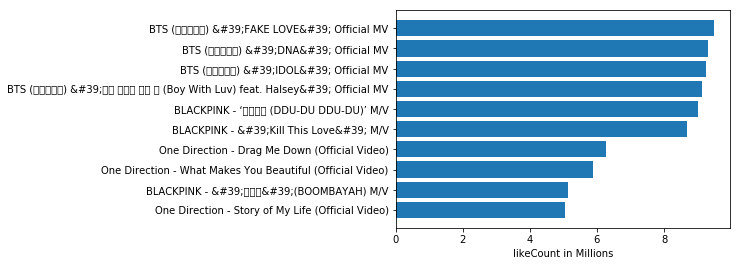

In [21]:
fig, ax = plt.subplots()
ax.barh(range(focus1.shape[0]),focus1['likeCount'])
ax.set_yticks(range(focus1.shape[0]))
ax.set_yticklabels(focus1['Title'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('likeCount in Millions')

plt.show()


In [22]:
#sorting the data by viewCount in descending order
data.sort_values("viewCount", axis = 0, ascending = False, 
                 inplace = True, na_position ='last')

In [23]:
focus1 = data.head(10) #select top 10 results by viewCount

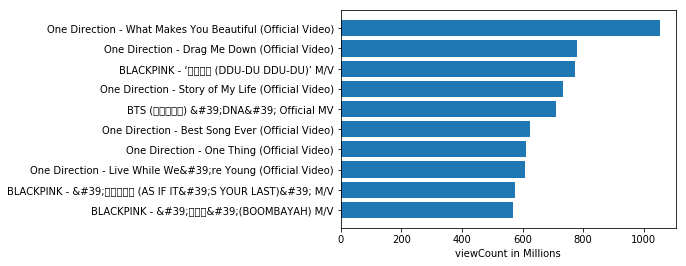

In [24]:
fig, ax = plt.subplots()
ax.barh(range(focus1.shape[0]),focus1['viewCount'])
ax.set_yticks(range(focus1.shape[0]))
ax.set_yticklabels(focus1['Title'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('viewCount in Millions')
plt.show()

#### References:
https://medium.com/greyatom/youtube-data-in-python-6147160c5833  
https://medium.com/@RareLoot/extract-youtube-video-statistics-based-on-a-search-query-308afd786bfe  
https://developers.google.com/youtube/v3/getting-started